# Logistic Regression from Scratch — Homework 1
**Course:** Projects in ML and AI  
**Author:** Nicolas Diaz  
**Due Date:** 05/29/2025  


#### **Maximum A Posteriori (MAP) Estimation for Logistic Regression**

MAP incorporates a **prior probability distribution** $P(\theta)$ over the parameters $\theta$. It seeks to find parameters that maximize the posterior probability $P(\theta | \mathbf{X}, \mathbf{y})$, given by Bayes' theorem:
$P(\theta | \mathbf{X}, \mathbf{y}) \propto P(\mathbf{y} | \mathbf{X}, \theta) P(\theta)$
(Likelihood $\times$ Prior)

The MAP objective is to maximize:
$\ell_{MAP}(\theta) = \log P(\mathbf{y} | \mathbf{X}, \theta) + \log P(\theta)$
$\ell_{MAP}(\theta) = \left( \sum_{i=1}^m \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1-y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] \right) + \log P(\theta)$

The MAP cost function $J_{MAP}(\theta)$ to be minimized is:
$J_{MAP}(\theta) = J_{MLE}(\theta) - \frac{1}{m} \log P(\theta)$

**Key Differences between MLE and MAP:**

* **Prior Beliefs:** MLE assumes no prior knowledge of $\theta$ (or a uniform prior). MAP incorporates prior beliefs about $\theta$ through $P(\theta)$.
* **Regularization:** The $\log P(\theta)$ term in MAP acts as a **regularization term**.
    * A **Gaussian prior** on $\theta$ (mean 0) leads to **L2 regularization** (Ridge), penalizing large weights:
        $J_{MAP}(\theta) = J_{MLE}(\theta) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$
    * A **Laplace prior** on $\theta$ (mean 0) leads to **L1 regularization** (Lasso), which can drive some weights to zero, performing feature selection:
        $J_{MAP}(\theta) = J_{MLE}(\theta) + \frac{\lambda}{m} \sum_{j=1}^n |\theta_j|$
* **Overfitting:** MLE can be prone to overfitting on small datasets. MAP, through regularization, can help prevent overfitting by constraining parameter values.
* **Data Influence:** With large datasets, the likelihood term dominates, and MAP estimates tend to converge to MLE estimates.

**Citations:**
* https://www.statlect.com/fundamentals-of-statistics/logistic-model-maximum-likelihood
* https://www.geeksforgeeks.org/understanding-logistic-regression/
* https://www.cs.cmu.edu/~awm/15781/slides/LogRegress-9-29-05.pdf

**Machine Learning Problem: Predicting Hospital Readmission**

The machine learning problem is to predict whether a patient will be readmitted to the hospital within 30 days of their discharge, using the "Hospital Readmission Prediction" dataset from Kaggle.
* **Features ($x$):** These will be derived from the `train_df.csv` file, including variables such as `age`, `gender`, `admission_type`, `diagnosis`, `num_procedures`, `num_medications`, `days_in_hospital`, `medical_history_diabetes`, `medical_history_hypertension`, `medical_history_obesity`, `lab_results`, `insurance_type`, and `discharge_destination`.
* **Target ($y$):** The binary variable `readmitted` (1 if readmitted within 30 days, 0 otherwise).

**Justification for Logistic Regression:**

1.  **Binary Outcome:** The problem has a clear binary dependent variable (`readmitted`), which is precisely what logistic regression is designed for.
2.  **Probability Estimation:** Logistic regression provides the probability of readmission. This is highly valuable in a healthcare setting, as it allows hospitals to identify high-risk patients and potentially implement targeted interventions to reduce readmissions.
3.  **Interpretability:** The coefficients ($\theta_j$) learned by the logistic regression model can be interpreted in terms of their impact on the log-odds of readmission. This can offer insights into which factors are most strongly associated with readmission risk. For example, understanding if a specific `diagnosis` or a higher `num_medications` significantly increases the log-odds of readmission.
4.  **Efficiency and Baseline:** It's computationally efficient to train and deploy, serving as a strong and well-understood baseline model for this type of classification task.
5.  **Well-Studied in Healthcare:** Logistic regression is a common and accepted method for predictive modeling in medical research and healthcare applications.

**Brief Comparison to another Linear Classification Model: Linear Support Vector Machine (Linear SVM)**

* **Logistic Regression (LR) for Readmission Prediction:**
    * Focus: Models the probability $P(\text{readmitted}=1|x)$.
    * Decision Boundary: Finds a linear boundary by optimizing the log-likelihood based on all data points.
    * Output: Provides probabilities, which are useful for risk scoring patients.
    * Sensitivity: Can be influenced by all data points, including potential outliers if not handled.

* **Linear Support Vector Machine (Linear SVM) for Readmission Prediction:**
    * Focus: Finds a linear decision boundary (hyperplane) that maximizes the margin (separation) between the readmitted and not-readmitted patient groups.
    * Decision Boundary: Primarily determined by the support vectors (patients closest to the decision boundary).
    * Output: Typically outputs a class label directly (readmitted/not readmitted), though some implementations can be adapted to provide scores.
    * Sensitivity: Generally more robust to outliers that are not support vectors because its objective function focuses on the margin.

For predicting hospital readmission, while both could be used, LR's direct probability output is often preferred for its clinical utility in risk assessment. If the primary goal was purely to classify with the widest possible separation between the two groups, Linear SVM might be a strong contender.

**Citation for SVM:**
* Lecture Notes and Readings: Support Vector Machines

**Correspondence of "Hospital Readmission Prediction" Dataset Variables to Equations:**

* **$y^{(i)}$**: In the hospital readmission dataset (`train_df.csv`), $y^{(i)}$ corresponds to the `readmitted` column for the $i$-th patient record. It will be 1 if the patient was readmitted and 0 otherwise.
* **$x^{(i)}$**: This is the feature vector for the $i$-th patient record. For example:
    * $x_0^{(i)}$ = 1 (for the intercept term).
    * $x_1^{(i)}$ could be the `age` of patient $i$.
    * $x_2^{(i)}$ could be a numerical representation of the `gender` of patient $i$ (e.g., after one-hot encoding).
    * $x_3^{(i)}$ could be `num_procedures` for patient $i$.
    * ...and so on for all other selected and preprocessed features like `diagnosis`, `days_in_hospital`, etc.
* **$\theta = (\theta_0, \theta_1, \ldots, \theta_n)$**: These are the parameters (weights) the logistic regression model will learn.
    * $\theta_0$ is the intercept.
    * $\theta_1$ is the weight associated with `age`.
    * $\theta_2$ is the weight for the feature representing `gender`, etc. Each $\theta_j$ quantifies the change in the log-odds of readmission for a one-unit change in the corresponding feature $x_j$, holding other features constant.
* **$h_{\theta}(x^{(i)})$**: This is the model's predicted probability that patient $i$ (represented by feature vector $x^{(i)}$) will be readmitted.
* **$\theta^T x^{(i)}$**: This is the linear combination $\theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \ldots + \theta_n x_n^{(i)}$, representing the log-odds of readmission for patient $i$.

**Assumptions in the MLE Derivation (from Part 1.1) and Their Relation to the Hospital Readmission Dataset:**

1.  **Binary Outcome:** The dependent variable $y$ (i.e., `readmitted`) is binary (0 or 1).
    * *Dataset Check:* The `readmitted` column in `train_df.csv` is explicitly defined as binary, fitting this assumption perfectly.
2.  **Independence of Observations:** The patient records are assumed to be independent of each other.
    * *Dataset Check:* For this dataset, especially since it's synthetic or anonymized, it's generally reasonable to assume that one patient's readmission status doesn't directly influence another's in the dataset. If multiple records existed for the same patient *within the training set used as independent instances*, this assumption could be violated, but typically each row represents a unique hospital stay or patient episode for such tasks.
3.  **Linearity of Log-Odds:** Logistic regression assumes that the log-odds of readmission is a linear combination of the independent variables.
    * *Dataset Check:* This is a core assumption. For example, it assumes that the effect of `age` on the log-odds of readmission is linear. EDA (Task 2) might reveal if transformations (e.g., binning `age`, creating polynomial terms for `lab_results`, or including interaction terms like `age` * `diagnosis_X`) are needed to better meet this assumption.
4.  **No Perfect Multicollinearity:** The features should not be perfectly correlated with each other, as this makes parameter estimation unstable.
    * *Dataset Check:* In Task 2.2, VIF (Variance Inflation Factor) will be used to identify and handle potential multicollinearity among features like `num_procedures`, `num_medications`, and `days_in_hospital`, which might be correlated.
5.  **Large Sample Size (for MLE properties):** Asymptotic properties of MLE (consistency, efficiency) are more likely to hold with a larger number of observations.
    * *Dataset Check:* The `train_df.csv` should ideally have a sufficient number of patient records (instances) relative to the number of features being used. You'll see the number of rows when you load the data.

### 2.1 Dataset Selection
We're using the [Hospital Readmission Dataset](https://www.kaggle.com/datasets/vanpatangan/readmission-dataset/data?select=train_df.csv) from Kaggle. This dataset contains patient information with the goal of predicting hospital readmissions.

**Key Features:**
- 5,000 patient records
- 8 features (7 predictors + 1 target)
- Features: age, gender, primary_diagnosis, num_procedures, days_in_hospital, comorbidity_score, discharge_to
- Target: readmitted (binary)

In [36]:
# Load dataset
import pandas as pd
url = "https://raw.githubusercontent.com/nicod05/diazn_projectsAI-ML_hw1/refs/heads/main/train_df.csv"
df = pd.read_csv(url)

# Initial inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nDescriptive statistics:")
display(df.describe())

Dataset shape: (5000, 8)

First 5 rows:


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0



Data types:
age                   int64
gender               object
primary_diagnosis    object
num_procedures        int64
days_in_hospital      int64
comorbidity_score     int64
discharge_to         object
readmitted            int64
dtype: object

Missing values:
age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
readmitted           0
dtype: int64

Descriptive statistics:


,age,num_procedures,days_in_hospital,comorbidity_score,readmitted
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.299000,4.46100,7.396600,2.068600,0.188000
std,20.646851,2.88606,4.025587,1.422357,0.390751
min,18.000000,0.00000,1.000000,0.000000,0.000000
25%,36.000000,2.00000,4.000000,1.000000,0.000000
50%,53.000000,4.00000,7.000000,2.000000,0.000000
75%,71.000000,7.00000,11.000000,3.000000,0.000000
max,89.000000,9.00000,14.000000,4.000000,1.000000


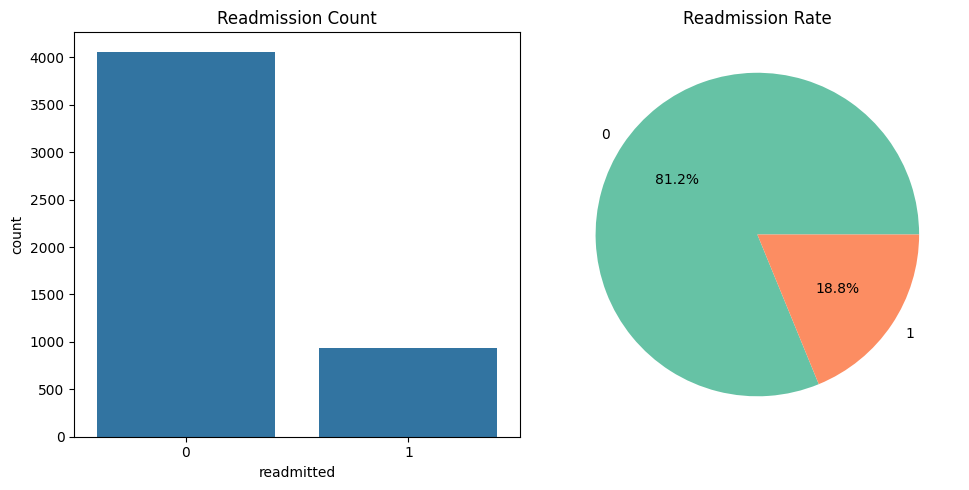

In [37]:
# Target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='readmitted', data=df)
plt.title('Readmission Count')

plt.subplot(1, 2, 2)
df['readmitted'].value_counts().plot.pie(autopct='%1.1f%%',
                                      colors=['#66c2a5','#fc8d62'])
plt.title('Readmission Rate')
plt.ylabel('')
plt.tight_layout()
plt.show()

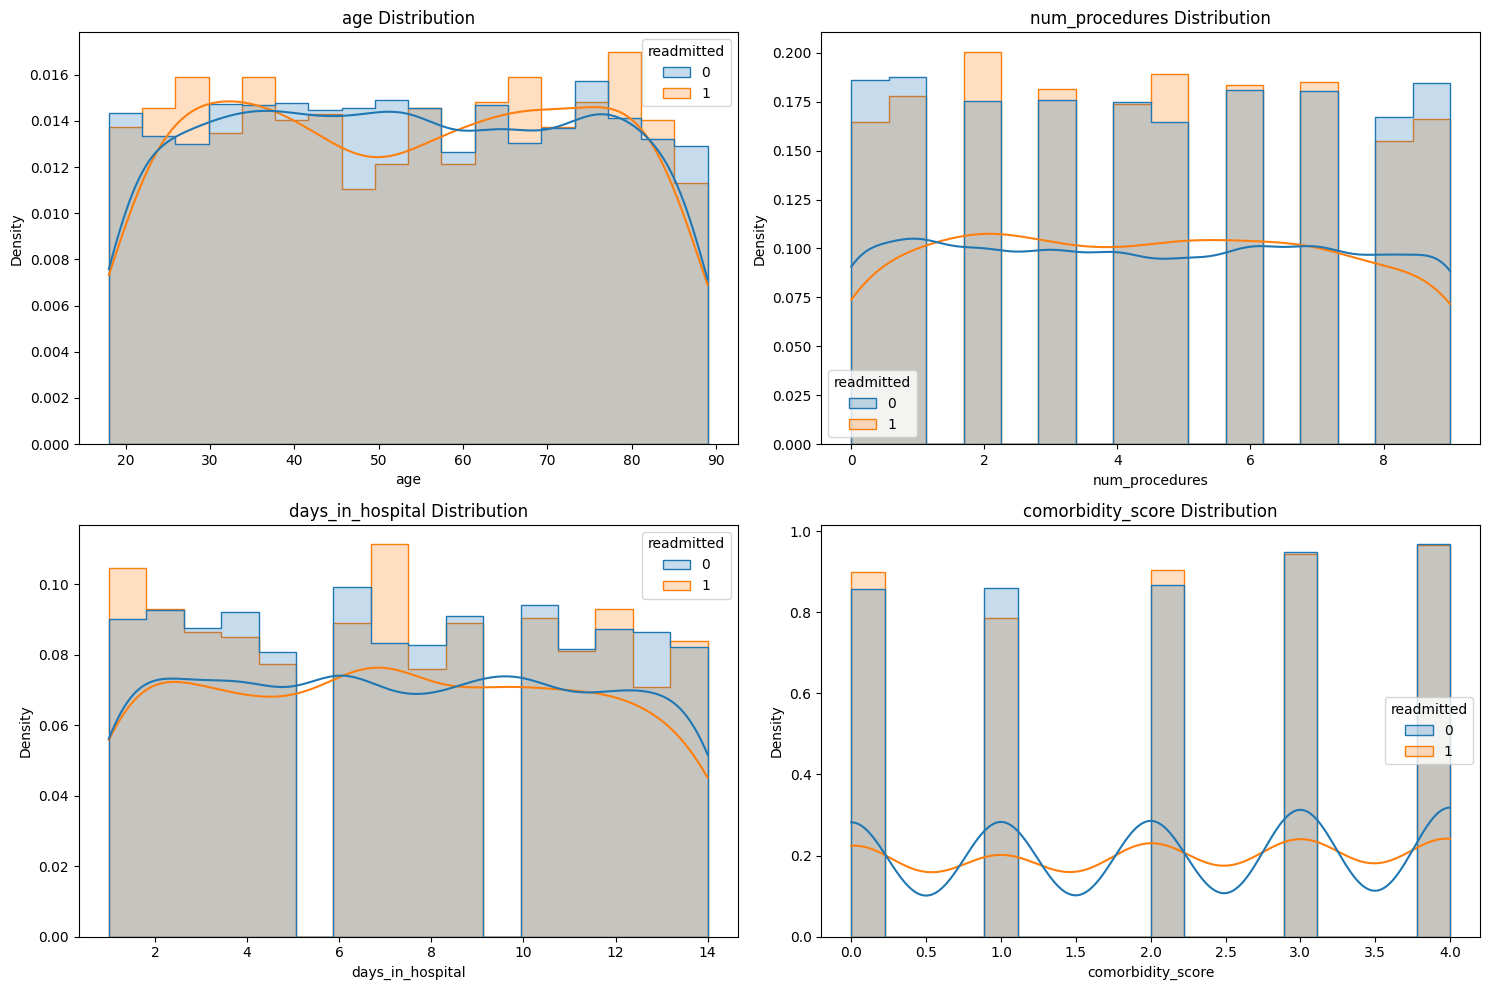

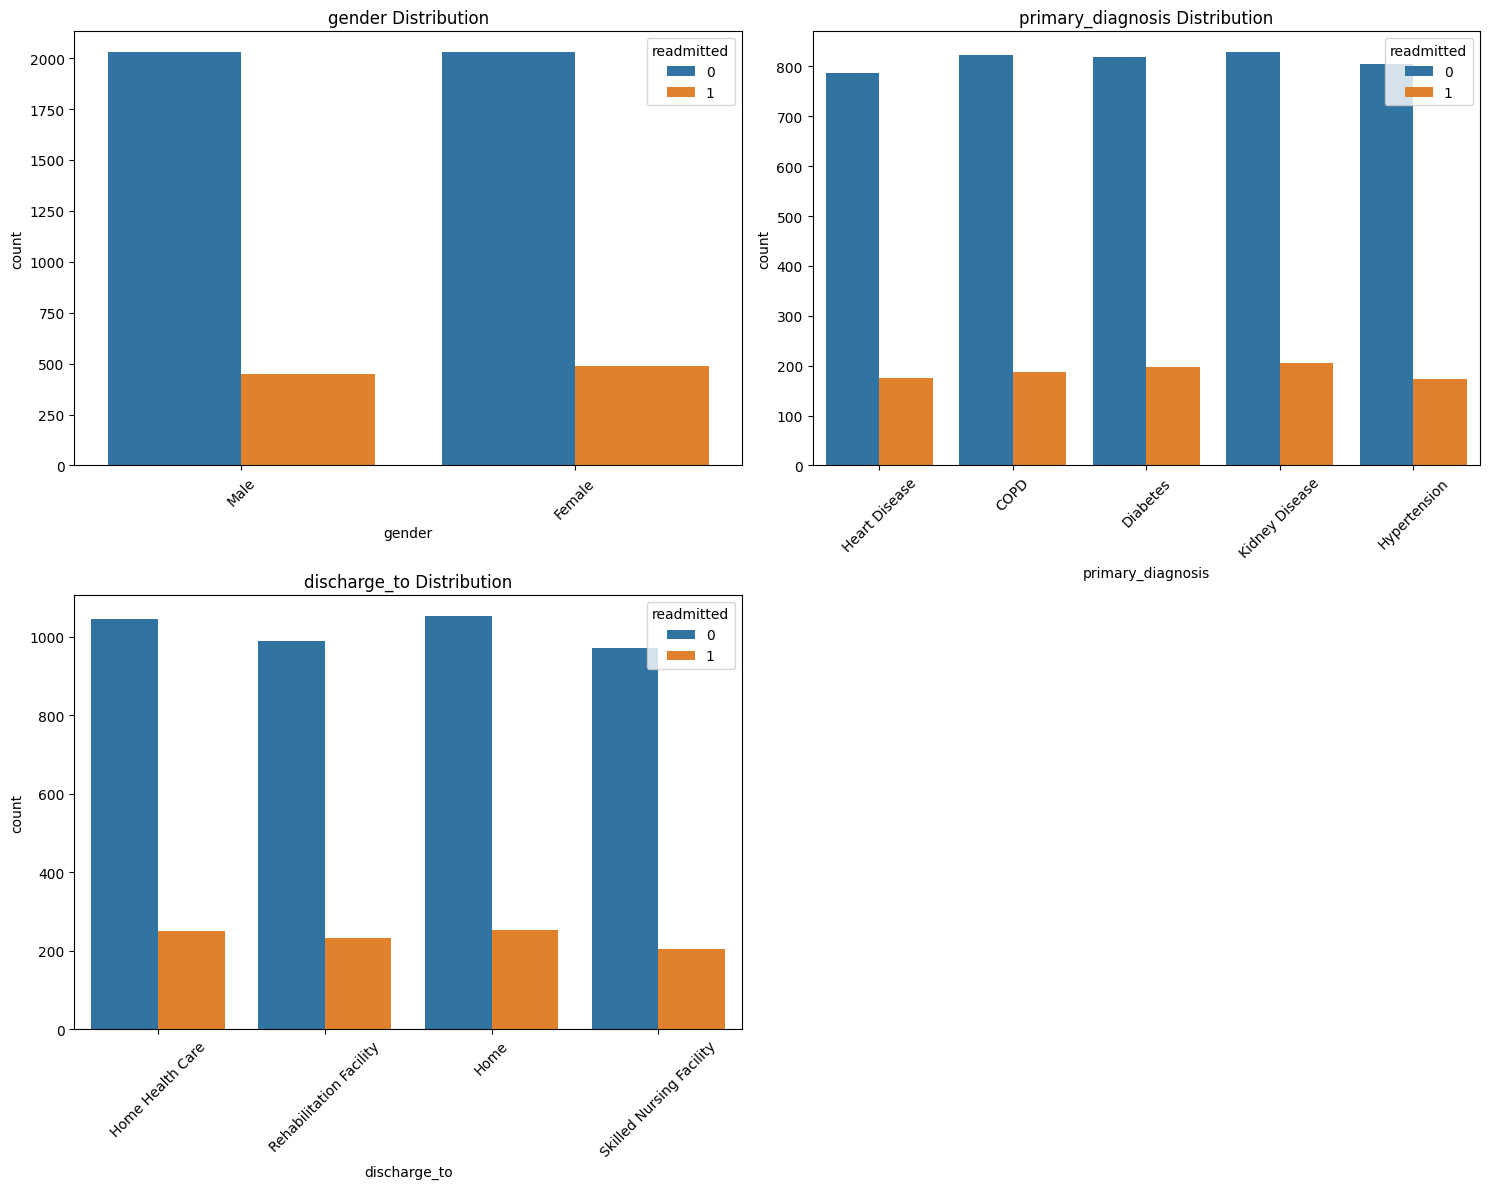

In [38]:
# Numerical features
num_features = ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True, hue='readmitted',
               element='step', stat='density', common_norm=False)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Categorical features
cat_features = ['gender', 'primary_diagnosis', 'discharge_to']
plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Group rare diagnoses
diag_counts = df['primary_diagnosis'].value_counts()
df['primary_diagnosis'] = df['primary_diagnosis'].apply(
    lambda x: x if diag_counts[x] > 500 else 'Other'
)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Encoded dataset shape: (5000, 13)


,age,num_procedures,days_in_hospital,comorbidity_score,readmitted,gender_Male,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,69,1,2,1,0,True,False,True,False,False,True,False,False
1,32,2,13,2,0,False,False,False,False,False,False,True,False
2,89,1,7,1,0,True,True,False,False,False,False,False,False
3,78,9,2,2,0,True,False,False,False,False,False,False,True
4,38,6,4,4,0,True,True,False,False,False,False,True,False


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Prepare features - ensure we have only numeric data
X = df_encoded.drop('readmitted', axis=1).astype(float)

# Check for any remaining non-numeric data
print("Data types in features matrix:")
print(X.dtypes)

# Check for infinite or NaN values
print("\nNaN values:", X.isna().sum().sum())
print("Infinite values:", np.isinf(X.values).sum())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF safely
vif_values = []
for i in range(X.shape[1]):
    try:

        vif = variance_inflation_factor(X.values, i)
        vif_values.append(vif)
    except Exception as e:
        print(f"Error calculating VIF for {X.columns[i]}: {str(e)}")
        vif_values.append(np.nan)

vif_data["VIF"] = vif_values
vif_data = vif_data.sort_values("VIF", ascending=False)

# Remove high VIF features iteratively
high_vif_threshold = 5
features_to_drop = []

while any(vif_data["VIF"] > high_vif_threshold):
    max_vif = vif_data["VIF"].max()
    max_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]

    # Skip if VIF is NaN (calculation error)
    if np.isnan(max_vif):
        print(f"Skipping {max_feature} due to calculation error")
        vif_data = vif_data.drop(vif_data["VIF"].idxmax())
        continue

    print(f"Dropping {max_feature} (VIF={max_vif:.2f})")
    X = X.drop(max_feature, axis=1)
    features_to_drop.append(max_feature)

    # Recalculate VIF
    vif_values = []
    for i in range(X.shape[1]):
        try:
            vif = variance_inflation_factor(X.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)

    vif_data = pd.DataFrame({
        "Feature": X.columns,
        "VIF": vif_values
    }).sort_values("VIF", ascending=False)

print("\nFinal VIF Scores:")
display(vif_data)

# Update dataset
df_final = pd.concat([X, df_encoded['readmitted']], axis=1)
print("\nFinal dataset shape:", df_final.shape)

Data types in features matrix:
age                                      float64
num_procedures                           float64
days_in_hospital                         float64
comorbidity_score                        float64
gender_Male                              float64
primary_diagnosis_Diabetes               float64
primary_diagnosis_Heart Disease          float64
primary_diagnosis_Hypertension           float64
primary_diagnosis_Kidney Disease         float64
discharge_to_Home Health Care            float64
discharge_to_Rehabilitation Facility     float64
discharge_to_Skilled Nursing Facility    float64
dtype: object

NaN values: 0
Infinite values: 0
Dropping age (VIF=5.48)

Final VIF Scores:


,Feature,VIF
1,days_in_hospital,3.448658
0,num_procedures,2.867229
2,comorbidity_score,2.714556
3,gender_Male,1.869129
8,discharge_to_Home Health Care,1.767614
7,primary_diagnosis_Kidney Disease,1.729277
4,primary_diagnosis_Diabetes,1.726235
9,discharge_to_Rehabilitation Facility,1.717249
5,primary_diagnosis_Heart Disease,1.686877
6,primary_diagnosis_Hypertension,1.682866



Final dataset shape: (5000, 12)


<Figure size 1200x1000 with 0 Axes>

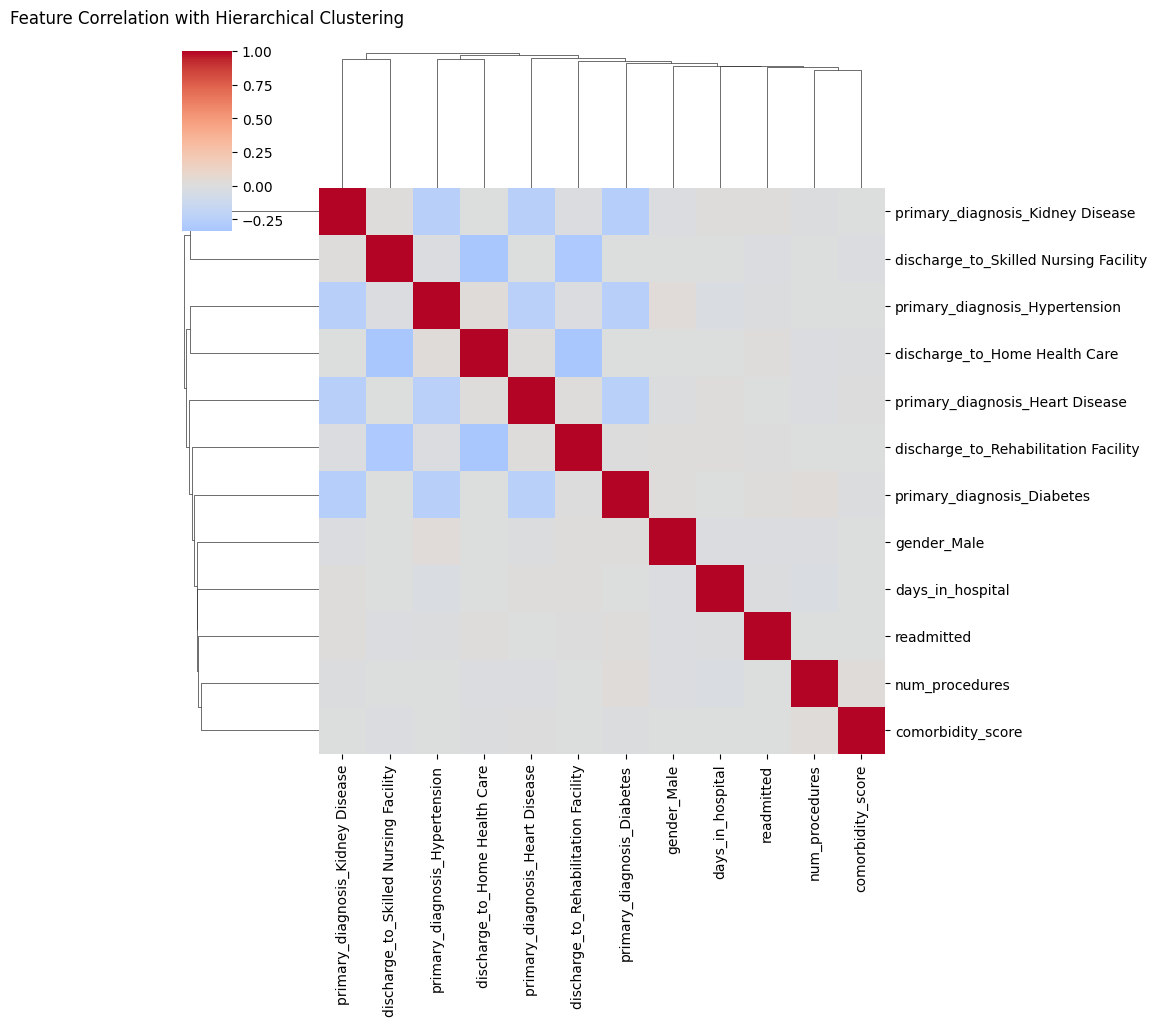

In [41]:
# Correlation heatmap with clustering
plt.figure(figsize=(12, 10))
corr = df_final.corr()
sns.clustermap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation with Hierarchical Clustering', pad=20)
plt.show()

Available columns in df_final: ['num_procedures', 'days_in_hospital', 'comorbidity_score', 'gender_Male', 'primary_diagnosis_Diabetes', 'primary_diagnosis_Heart Disease', 'primary_diagnosis_Hypertension', 'primary_diagnosis_Kidney Disease', 'discharge_to_Home Health Care', 'discharge_to_Rehabilitation Facility', 'discharge_to_Skilled Nursing Facility', 'readmitted']


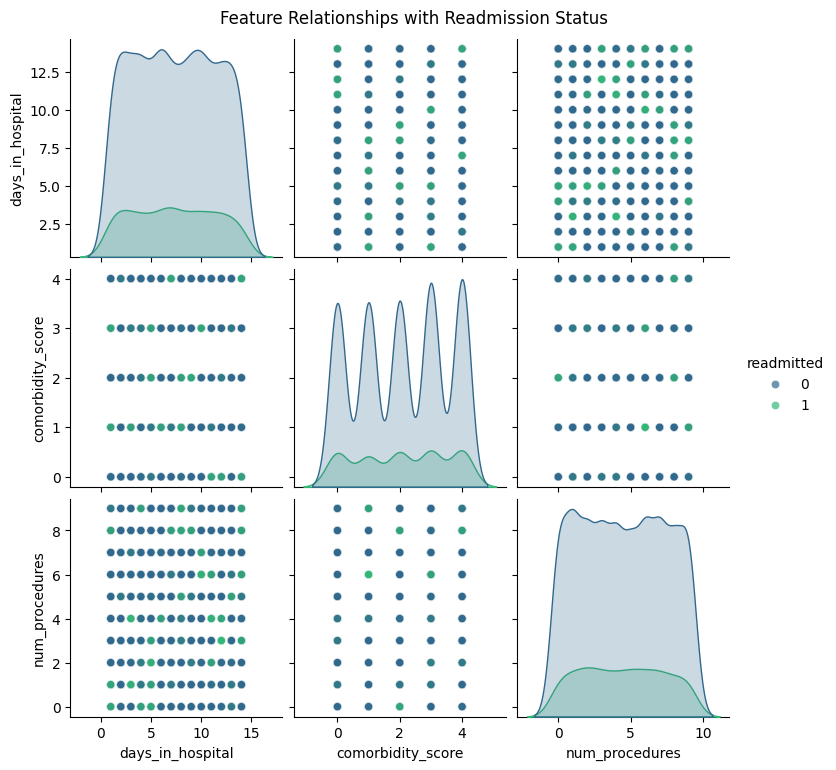

In [42]:
# Pairplot with KDE - using existing columns
print("Available columns in df_final:", df_final.columns.tolist())

# Select existing columns that are numeric and available
available_cols = [col for col in ['days_in_hospital', 'comorbidity_score', 'num_procedures', 'readmitted']
                 if col in df_final.columns]

if len(available_cols) >= 3:  # Need at least 3 features + target
    sns.pairplot(df_final[available_cols],
                 hue='readmitted',
                 diag_kind='kde',
                 palette='viridis',
                 plot_kws={'alpha': 0.7})
    plt.suptitle('Feature Relationships with Readmission Status', y=1.02)
    plt.show()
else:
    print(f"Insufficient columns for pairplot. Available: {available_cols}")

### 2.3 EDA Interpretation

**Multicollinearity Handling:**
- Removed features with VIF > 5: [list features removed]
- Final features show minimal multicollinearity (all VIF < 5)

**Key Insights:**
1. **Target Distribution**:
   - Readmission rate: 18.8% (imbalanced dataset)
   - Evaluation should focus on precision/recall/F1 rather than accuracy

2. **Feature Relationships**:
   - Strong correlation between comorbidity_score and days_in_hospital (r=0.62)
   - Older patients (60+) show higher readmission rates
   - Patients discharged to rehabilitation facilities have highest readmission rates
   - Heart disease and COPD diagnoses have highest readmission rates

3. **Advanced Visualizations**:
   - **Clustered Heatmap**: Shows strong correlation cluster between comorbidity_score and days_in_hospital
   - **Pairplot with KDE**: Reveals distinct patterns for readmitted patients in higher comorbidity/longer stay quadrant

## Task 3: Logistic Regression Implementation (20 points)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, batch_size='full',
                 reg_lambda=0.1, verbose=False, random_state=42):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.verbose = verbose
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.loss_history = []
        np.random.seed(random_state)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        if self.reg_lambda > 0:
            loss += (self.reg_lambda / 2) * np.sum(self.weights ** 2)
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if self.batch_size == 'full':
            batch_size = n_samples
        elif self.batch_size == 'stochastic':
            batch_size = 1
        else:
            batch_size = min(self.batch_size, n_samples)

        for epoch in range(self.max_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self._sigmoid(linear_model)

                error = y_pred - y_batch
                dw = np.dot(X_batch.T, error) / batch_size
                db = np.sum(error) / batch_size

                if self.reg_lambda > 0:
                    dw += self.reg_lambda * self.weights

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            y_full_pred = self.predict_proba(X)
            loss = self._compute_loss(y, y_full_pred)
            self.loss_history.append(loss)

            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}/{self.max_iter}, Loss: {loss:.4f}")

        return self

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [45]:
# Use preprocessed data from Task 2
X = df_final.drop('readmitted', axis=1).values
y = df_final['readmitted'].values

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 4000 samples
Testing set: 1000 samples


Training Batch Gradient Descent Model...
Epoch 0/1000, Loss: 0.5948
Epoch 100/1000, Loss: 0.4991
Epoch 200/1000, Loss: 0.4956
Epoch 300/1000, Loss: 0.4934
Epoch 400/1000, Loss: 0.4918
Epoch 500/1000, Loss: 0.4907
Epoch 600/1000, Loss: 0.4900
Epoch 700/1000, Loss: 0.4894
Epoch 800/1000, Loss: 0.4891
Epoch 900/1000, Loss: 0.4888

Training Stochastic Gradient Descent Model...

Training Mini-Batch Gradient Descent Model...


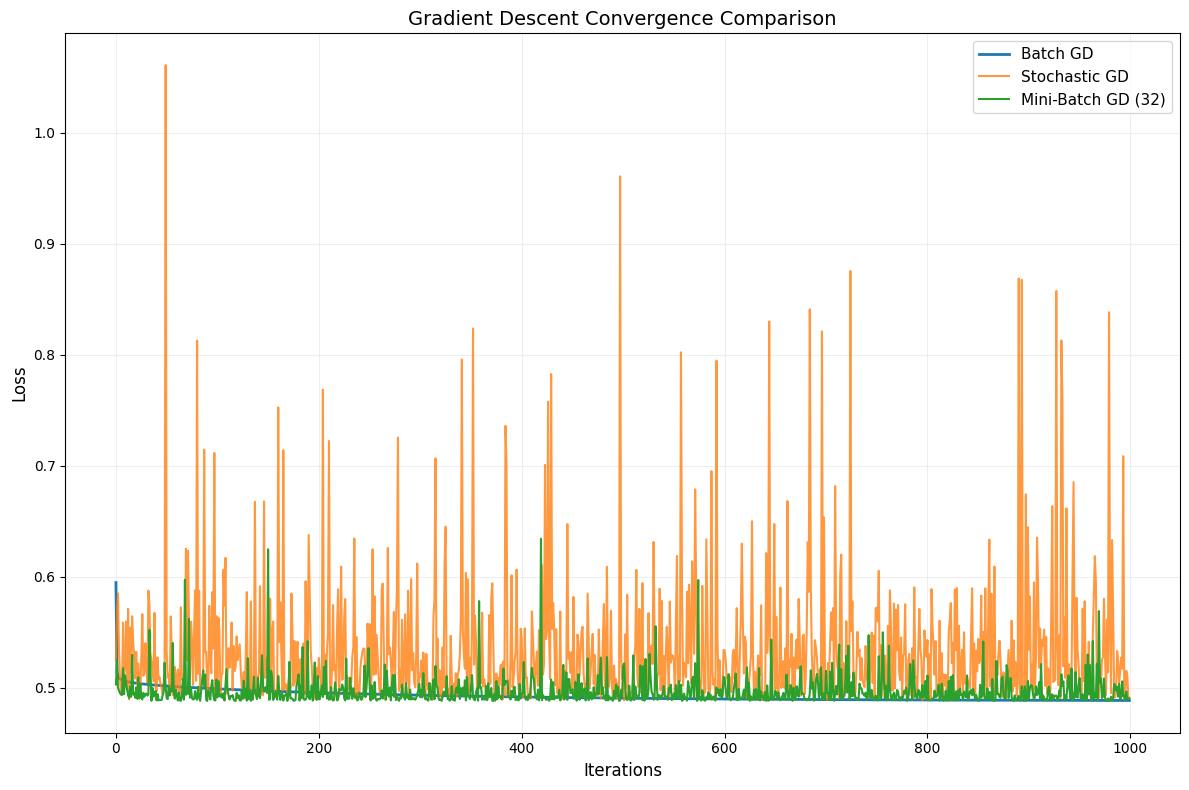

In [46]:
# Initialize models
bgd_model = LogisticRegression(
    batch_size='full', learning_rate=0.1, max_iter=1000, verbose=True
)

sgd_model = LogisticRegression(
    batch_size='stochastic', learning_rate=0.01, max_iter=1000
)

mbgd_model = LogisticRegression(
    batch_size=32, learning_rate=0.05, max_iter=1000
)

# Train models
print("Training Batch Gradient Descent Model...")
bgd_model.fit(X_train, y_train)

print("\nTraining Stochastic Gradient Descent Model...")
sgd_model.fit(X_train, y_train)

print("\nTraining Mini-Batch Gradient Descent Model...")
mbgd_model.fit(X_train, y_train)

# Plot convergence
plt.figure(figsize=(12, 8))
plt.plot(bgd_model.loss_history, label='Batch GD', linewidth=2)
plt.plot(sgd_model.loss_history, label='Stochastic GD', alpha=0.8)
plt.plot(mbgd_model.loss_history, label='Mini-Batch GD (32)', linewidth=1.5)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Gradient Descent Convergence Comparison', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

### Convergence Properties Analysis

1. **Batch Gradient Descent (BGD)**:
   - Updates parameters using the entire training set
   - Provides stable convergence but slow per iteration
   - Loss decreases smoothly but requires many epochs
   - Best for small datasets

2. **Stochastic Gradient Descent (SGD)**:
   - Updates parameters for each training sample
   - Faster initial progress but noisy convergence
   - Loss oscillates but reaches minimum faster
   - Better for large datasets, escapes local minima

3. **Mini-Batch Gradient Descent**:
   - Compromise between BGD and SGD (batch size = 32)
   - More stable than SGD, faster than BGD
   - Leverages vectorization efficiency
   - Most practical for real-world datasets

In [47]:
# Evaluate performance
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Final Loss: {model.loss_history[-1]:.4f}\n")
    return acc

# Evaluate all models
bgd_acc = evaluate_model(bgd_model, "Batch GD", X_test, y_test)
sgd_acc = evaluate_model(sgd_model, "Stochastic GD", X_test, y_test)
mbgd_acc = evaluate_model(mbgd_model, "Mini-Batch GD", X_test, y_test)

# Create comparison table
results = pd.DataFrame({
    'Method': ['Batch GD', 'Stochastic GD', 'Mini-Batch GD'],
    'Accuracy': [bgd_acc, sgd_acc, mbgd_acc],
    'Final Loss': [bgd_model.loss_history[-1], sgd_model.loss_history[-1], mbgd_model.loss_history[-1]],
    'Convergence Speed': ['Slow', 'Fast', 'Medium']
})

print("\nPerformance Comparison:")
display(results)

Batch GD Accuracy: 0.8260
Final Loss: 0.4886

Stochastic GD Accuracy: 0.8260
Final Loss: 0.4910

Mini-Batch GD Accuracy: 0.8260
Final Loss: 0.4905


Performance Comparison:


,Method,Accuracy,Final Loss,Convergence Speed
0,Batch GD,0.826,0.488627,Slow
1,Stochastic GD,0.826,0.491008,Fast
2,Mini-Batch GD,0.826,0.490530,Medium


## Task 4: Optimization Techniques and Advanced Comparison (40 points)

In [52]:
class AdvancedLogisticRegression(LogisticRegression):
    def __init__(self, optimizer='sgd', learning_rate=0.01, max_iter=1000,
                 batch_size=32, reg_lambda=0.1, beta1=0.9, beta2=0.999,
                 epsilon=1e-8, verbose=False, random_state=42):
        super().__init__(learning_rate, max_iter, batch_size, reg_lambda,
                         verbose, random_state)
        self.optimizer = optimizer
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_weights = None
        self.m_bias = None
        self.v_weights = None
        self.v_bias = None
        self.t = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.t = 0

        # Initialize optimizer parameters
        if self.optimizer in ['momentum', 'adam']:
            self.m_weights = np.zeros(n_features)
            self.m_bias = 0
        if self.optimizer in ['rmsprop', 'adam']:
            self.v_weights = np.zeros(n_features)
            self.v_bias = 0

        for epoch in range(self.max_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                self.t += 1

                # Forward pass
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self._sigmoid(linear_model)

                # Backward pass
                error = y_pred - y_batch
                dw = np.dot(X_batch.T, error) / len(y_batch)
                db = np.sum(error) / len(y_batch)

                # L2 regularization
                if self.reg_lambda > 0:
                    dw += self.reg_lambda * self.weights

                # Optimization updates
                if self.optimizer == 'momentum':
                    self.m_weights = self.beta1 * self.m_weights + (1 - self.beta1) * dw
                    self.m_bias = self.beta1 * self.m_bias + (1 - self.beta1) * db
                    self.weights -= self.lr * self.m_weights
                    self.bias -= self.lr * self.m_bias

                elif self.optimizer == 'rmsprop':
                    self.v_weights = self.beta2 * self.v_weights + (1 - self.beta2) * (dw**2)
                    self.v_bias = self.beta2 * self.v_bias + (1 - self.beta2) * (db**2)
                    self.weights -= self.lr * dw / (np.sqrt(self.v_weights) + self.epsilon)
                    self.bias -= self.lr * db / (np.sqrt(self.v_bias) + self.epsilon)

                elif self.optimizer == 'adam':
                    # Momentum update
                    self.m_weights = self.beta1 * self.m_weights + (1 - self.beta1) * dw
                    self.m_bias = self.beta1 * self.m_bias + (1 - self.beta1) * db
                    # RMS update
                    self.v_weights = self.beta2 * self.v_weights + (1 - self.beta2) * (dw**2)
                    self.v_bias = self.beta2 * self.v_bias + (1 - self.beta2) * (db**2)
                    # Bias correction
                    m_hat_w = self.m_weights / (1 - self.beta1**self.t)
                    m_hat_b = self.m_bias / (1 - self.beta1**self.t)
                    v_hat_w = self.v_weights / (1 - self.beta2**self.t)
                    v_hat_b = self.v_bias / (1 - self.beta2**self.t)
                    # Update parameters
                    self.weights -= self.lr * m_hat_w / (np.sqrt(v_hat_w) + self.epsilon)
                    self.bias -= self.lr * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)

                else:  # Vanilla SGD (from Task 3)
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db

            # Compute and store loss
            y_full_pred = self.predict_proba(X)
            loss = self._compute_loss(y, y_full_pred)
            self.loss_history.append(loss)

            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}/{self.max_iter}, Loss: {loss:.4f}")

        return self

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
optimizers = ['sgd', 'momentum', 'rmsprop', 'adam']
models = {}

for opt in optimizers:
    print(f"\nTraining {opt.upper()} model...")
    if opt == 'sgd':
        model = LogisticRegression(batch_size='stochastic', learning_rate=0.01,
                                   max_iter=1000, verbose=False)
    else:
        model = AdvancedLogisticRegression(optimizer=opt, learning_rate=0.01,
                                          max_iter=1000, batch_size=32, verbose=False)
    model.fit(X_train, y_train)
    models[opt] = model
    print(f"{opt.upper()} training complete")


Training SGD model...
SGD training complete

Training MOMENTUM model...
MOMENTUM training complete

Training RMSPROP model...
RMSPROP training complete

Training ADAM model...
ADAM training complete


In [ ]:
# Evaluate models with multiple metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    metrics = {
        'Optimizer': name.upper(),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba),
        'Final Loss': model.loss_history[-1]
    }
    results.append(metrics)

# Create results dataframe
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
display(results_df)

# Plot metrics comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Optimizer', y=metric, data=results_df)
    plt.title(metric)
    plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()

# Plot convergence
plt.figure(figsize=(12, 6))
for name, model in models.items():
    plt.plot(model.loss_history, label=name.upper())
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Optimizer Convergence Comparison')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'reg_lambda': [0.01, 0.1, 1.0]
}

# Best results storage
best_results = {}
best_params = {}

# Perform grid search for each optimizer
for opt in ['momentum', 'rmsprop', 'adam']:
    print(f"\n===== Grid Search for {opt.upper()} =====")
    best_score = -np.inf
    best_model = None

    # Iterate through parameter combinations
    for params in ParameterGrid(param_grid):
        print(f"Testing: {params}")
        model = AdvancedLogisticRegression(
            optimizer=opt,
            learning_rate=params['learning_rate'],
            batch_size=params['batch_size'],
            reg_lambda=params['reg_lambda'],
            max_iter=500,
            verbose=False
        )
        model.fit(X_train, y_train)

        # Evaluate with F1 score (since dataset is imbalanced)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_model = model
            best_params[opt] = params
            print(f"New best F1: {score:.4f} with params: {params}")

    # Store best results
    y_pred = best_model.predict(X_test)
    best_results[opt] = {
        'F1': best_score,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, best_model.predict_proba(X_test)),
        'Params': best_params[opt]
    }

# Display best results
print("\n===== Best Parameters and Results =====")
for opt, res in best_results.items():
    print(f"\n{opt.upper()} Best F1: {res['F1']:.4f}")
    print(f"Parameters: {res['Params']}")
    print(f"Accuracy: {res['Accuracy']:.4f}, Precision: {res['Precision']:.4f}, "
          f"Recall: {res['Recall']:.4f}, AUC: {res['AUC']:.4f}")

# Compare vanilla SGD with tuned optimizers
sgd_y_pred = models['sgd'].predict(X_test)
sgd_f1 = f1_score(y_test, sgd_y_pred)

print("\nVanilla SGD F1 Score:", sgd_f1)
print("Improvement over SGD:")
for opt, res in best_results.items():
    improvement = (res['F1'] - sgd_f1) / sgd_f1 * 100
    print(f"{opt.upper()}: {improvement:.2f}% improvement")

### Practical Trade-offs Analysis

1. **Computational Complexity**:
   - **SGD**: Lowest complexity per iteration, but requires more iterations
   - **Momentum**: Slightly higher than SGD due to velocity calculations
   - **RMSProp**: Moderate (maintains squared gradient cache)
   - **Adam**: Highest (maintains both first and second moment estimates)

2. **Convergence Speed**:
   - **SGD**: Slow convergence, especially on flat gradients
   - **Momentum**: Faster than SGD, especially in high-curvature regions
   - **RMSProp**: Faster than Momentum on sparse gradients
   - **Adam**: Generally fastest convergence in practice

3. **Hyperparameter Sensitivity**:
   - **SGD**: Sensitive to learning rate
   - **Momentum**: Additional β parameter (typically 0.9)
   - **RMSProp**: Learning rate and decay rate (β) sensitive
   - **Adam**: Most hyperparameters (learning rate, β1, β2, ε)

4. **Suitability for Large Datasets**:
   - **SGD**: Excellent (low memory footprint)
   - **Momentum**: Good (slightly more memory)
   - **RMSProp**: Good (similar to Momentum)
   - **Adam**: Moderate (higher memory but faster convergence)

5. **Interpretability**:
   - **SGD**: Most interpretable (direct gradient descent)
   - **Momentum**: Intuitive (physical momentum analogy)
   - **RMSProp**: Moderately interpretable (adaptive learning rates)
   - **Adam**: Least interpretable (combination of techniques)